In [407]:
# Coded by Carlos Goes (Instituto Mercado Popular)

# This do file aims at
# 1. generating stationary and non-stationary data
# 2. providing examples of spurious regressions

# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Define length of time series

tlength = 10000

# Define number of non-stationary series to be created

wide = 5

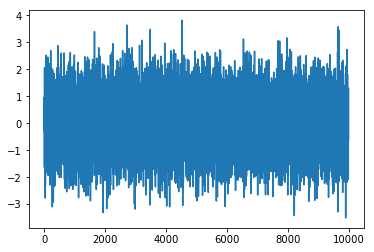

In [408]:
# Generate and plot a stationary series using the built-in command

stationary = np.random.randn(tlength)
plt.plot(stationary)
plt.show()

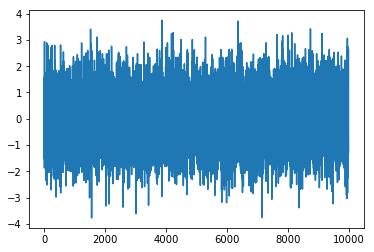

In [409]:
# Generate and plot a stationary series using a loop

holder = [] 

for i in range(tlength):
    e = np.random.randn()
    holder.append(e)

plt.plot(holder)
plt.show()

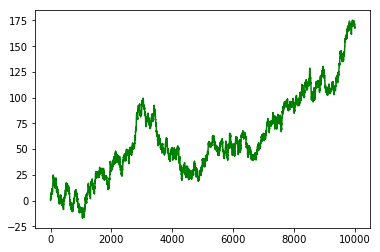

In [410]:
# Generate and plot a non-stationary series using a loop

holder = [] 

for i in range(tlength):
    if i == 0:  # generates a random observation for the first period
        b = np.random.randn()
        holder.append(b)    
    else: # adds a new random number to the past observations for subsequent observations
        e = np.random.randn()
        b = holder[i-1] + e
        holder.append(b)

plt.plot(holder, 'green')
plt.show()

In [411]:
# Generalize non-stationary as a program

def nonstationary(n):
    holder = []
    for i in range(n):
        if i == 0:
            b = np.random.randn()
            holder.append(b)    
        else:
            e = np.random.randn()
            b = holder[i-1] + e
            holder.append(b)
    return holder

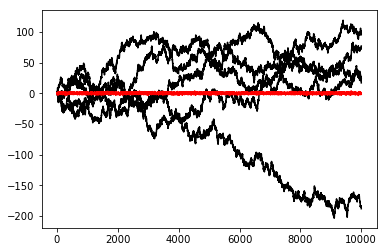

In [412]:
# Generate n nonstationary series and compare them to a stationary series

matrixns = np.matrix([[0 for x in range(wide)] for y in range(tlength)])

for i in range(wide):
    data = nonstationary(tlength)
    matrixns[:,i] = np.transpose(np.matrix(data))
    plt.plot(matrixns[:,i], 'black')

plt.plot(stationary, 'red')
    
plt.show()

In [413]:
# Generalize stationary series generators as a program

def arstationary(n,alpha):
    if alpha >= 1:
        print("Alpha needs to be smaller than one")
    else:
        holder = []
        for i in range(n):
            if i == 0:
                b = np.random.randn()
                holder.append(b)    
            else:
                e = np.random.randn()
                b = alpha * holder[i-1] + e
                holder.append(b)
        return holder

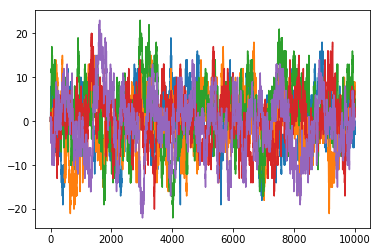

In [414]:
# Generate n nonstationary series and compare them to a stationary series

matrix = np.matrix([[0 for x in range(wide)] for y in range(tlength)])

for i in range(wide):
    data = arstationary(tlength,0.99)
    matrix[:,i] = np.transpose(np.matrix(data))
    plt.plot(matrix[:,i])
    
plt.show()

In [415]:
# Define dataframe from simulated series
df = pd.DataFrame(matrixns, columns=('a','b','c','d','e'))

# Fit Linear models
lm = smf.ols(formula='a ~ b', data = df).fit()
lm2 = smf.ols(formula='b ~ c', data = df).fit()
lm3 = smf.ols(formula='c ~ d', data = df).fit()
lm4 = smf.ols(formula='d ~ e', data = df).fit()

# Print outputs
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     3586.
Date:                Tue, 28 Feb 2017   Prob (F-statistic):               0.00
Time:                        00:29:18   Log-Likelihood:                -55439.
No. Observations:               10000   AIC:                         1.109e+05
Df Residuals:                    9998   BIC:                         1.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -31.3538      0.951    -32.974      0.000       -33.218   -29.490
b             -0.9552      0.016    -59.884      0.000        -0.986    -0.924
==============================================================================
Omnibus:                     1646.640   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1133.011
Skew:                          -0.714   Prob(JB):                    9.33e-247
Kurtosis:                       2.175   Cond. No.                         91.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [416]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      b   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1314.
Date:                Tue, 28 Feb 2017   Prob (F-statistic):          1.98e-270
Time:                        00:29:18   Log-Likelihood:                -50153.
No. Observations:               10000   AIC:                         1.003e+05
Df Residuals:                    9998   BIC:                         1.003e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     31.2385      0.532     58.749      0.000        30.196    32.281
c              0.3760      0.010     36.249      0.000         0.356     0.396
==============================================================================
Omnibus:                     9899.098   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.627
Skew:                          -0.181   Prob(JB):                    1.06e-145
Kurtosis:                       1.787   Cond. No.                         74.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [417]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     4519.
Date:                Tue, 28 Feb 2017   Prob (F-statistic):               0.00
Time:                        00:29:18   Log-Likelihood:                -47922.
No. Observations:               10000   AIC:                         9.585e+04
Df Residuals:                    9998   BIC:                         9.586e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     60.2922      0.450    134.117      0.000        59.411    61.173
d             -0.6811      0.010    -67.225      0.000        -0.701    -0.661
==============================================================================
Omnibus:                        0.154   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.179
Skew:                           0.002   Prob(JB):                        0.914
Kurtosis:                       2.980   Cond. No.                         68.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [418]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     5749.
Date:                Tue, 28 Feb 2017   Prob (F-statistic):               0.00
Time:                        00:29:18   Log-Likelihood:                -45521.
No. Observations:               10000   AIC:                         9.105e+04
Df Residuals:                    9998   BIC:                         9.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     30.9317      0.233    133.038      0.000        30.476    31.387
e             -0.5275      0.007    -75.822      0.000        -0.541    -0.514
==============================================================================
Omnibus:                      254.106   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.223
Skew:                          -0.039   Prob(JB):                     8.70e-29
Kurtosis:                       2.449   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""